In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from genetic import GeneticExtractor

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(1337)  # Random seed for reproducibility

from tslearn.datasets import UCR_UEA_datasets

In [2]:
# Load ItalyPowerDemand dataset
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset('ItalyPowerDemand')
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

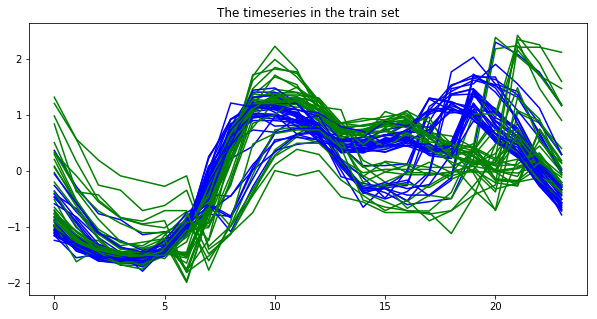

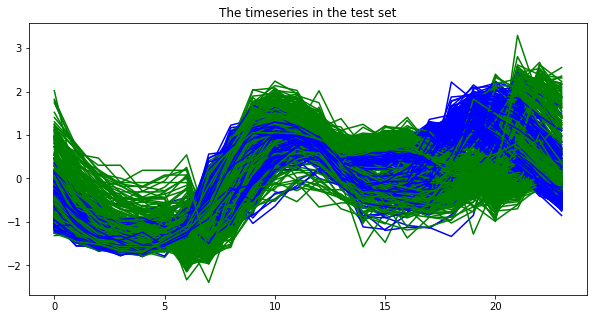

In [3]:
# Visualize the timeseries in the train and test set
colors = ['r', 'b', 'g', 'y', 'c']

plt.figure(figsize=(10, 5))
for ts, label in zip(X_train, y_train):
    plt.plot(range(len(ts)), ts, c=colors[label%len(colors)])
plt.title('The timeseries in the train set')
plt.show()

plt.figure(figsize=(10, 5))
for ts, label in zip(X_test, y_test):
    plt.plot(range(len(ts)), ts, c=colors[label%len(colors)])
plt.title('The timeseries in the test set')
plt.show()

it		avg		std		max		time
1		-0.5128		0.074		-0.245015	0.7148
2		-0.4825		0.074		-0.245015	0.8614
3		-0.439		0.071		-0.245015	0.8925
4		-0.4008		0.055		-0.245015	1.2099
5		-0.3557		0.053		-0.234328	1.4821
6		-0.3374		0.056		-0.234328	1.4294
7		-0.3132		0.054		-0.234328	1.7841
8		-0.2823		0.041		-0.234328	1.7203
9		-0.2741		0.043		-0.221641	2.0606
10		-0.2569		0.04		-0.208684	1.3565


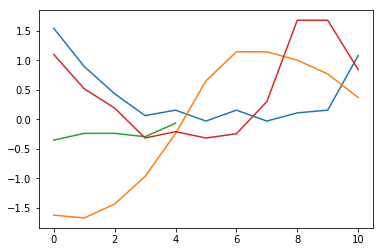

In [4]:
# Extract the shapelets using the train set. Enabled verbosity. 
# Plotting is possible too, by setting plot='notebook' in jupyter or True else
genetic_extractor = GeneticExtractor(verbose=True, population_size=50, iterations=10, plot=None)
genetic_extractor.fit(X_train, y_train)

plt.figure()
for shap in genetic_extractor.shapelets:
    plt.plot(shap)
plt.show()

In [5]:
# Calculate distances from timeseries to extracted shapelets and fit a Logistic Regression model
distances_train = genetic_extractor.transform(X_train)
distances_test = genetic_extractor.transform(X_test)

lr = LogisticRegression()
lr.fit(distances_train, y_train)

# Print the accuracy score on the test set
print('Accuracy = {}'.format(accuracy_score(y_test, lr.predict(distances_test))))

Accuracy = 0.9310009718172984
